##### Plots

In [16]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.12.2


In [ ]:
PY_TO_TB = {
    "tensorboard_4b284b84b10c4py": "LgjVGSJWTmqnOvOWtygXCw",
    "tensorboard_4b284b84b20c4py": "tPRSzWIETRa186YmXGjkZA",
    "tensorboard_4b284b84b30c4py": "6zTyGkELQ8SYhEM3b2v0JA",
    "tensorboard_4b284b84b40c4py": "swrEprtqTkO7RIx1K23BNw",
    "tensorboard_4b284b84b50c4py": "NhjyJzbBS7uYZ7VF5h4a1Q",
    "tensorboard_4b284b84b60c4py": "8Cepmp2DT5250sjhluRX3g",
    "tensorboard_4b284b84b70c4py": "ZGAYe7cnQLG6qNTXZqb1Qg",
    "tensorboard_4b284b84b80c4py": "xrS5xq7rRAy6YMN7t0bVnA",
    "tensorboard_4b284b84b90c4py": "LSaBOyI3QqqVb39WVZ3Piw",
}

DL = True
data_c4 = []
data_py = []

for k, v in PY_TO_TB.items():
    if DL == False:
        experiment = tb.data.experimental.ExperimentFromDev(v)
        df = experiment.get_scalars()
        df[df["tag"] == f'lm-loss-validation/validation/lm loss validation vs tokens'].to_csv(f"{k}.csv")
        df[df["tag"] == f'lm-loss-validation/validation_python/lm loss validation vs tokens'].to_csv(f"{k}_python.csv")
    else:
        !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tbc4py/{k}.csv
        df = pd.read_csv(f"{k}.csv", index_col=0)
        data_c4.append((df.step.values, df.value.values))

        !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tbc4py/{k}_python.csv
        df = pd.read_csv(f"{k}_python.csv", index_col=0)
        data_py.append((df.step.values, df.value.values))


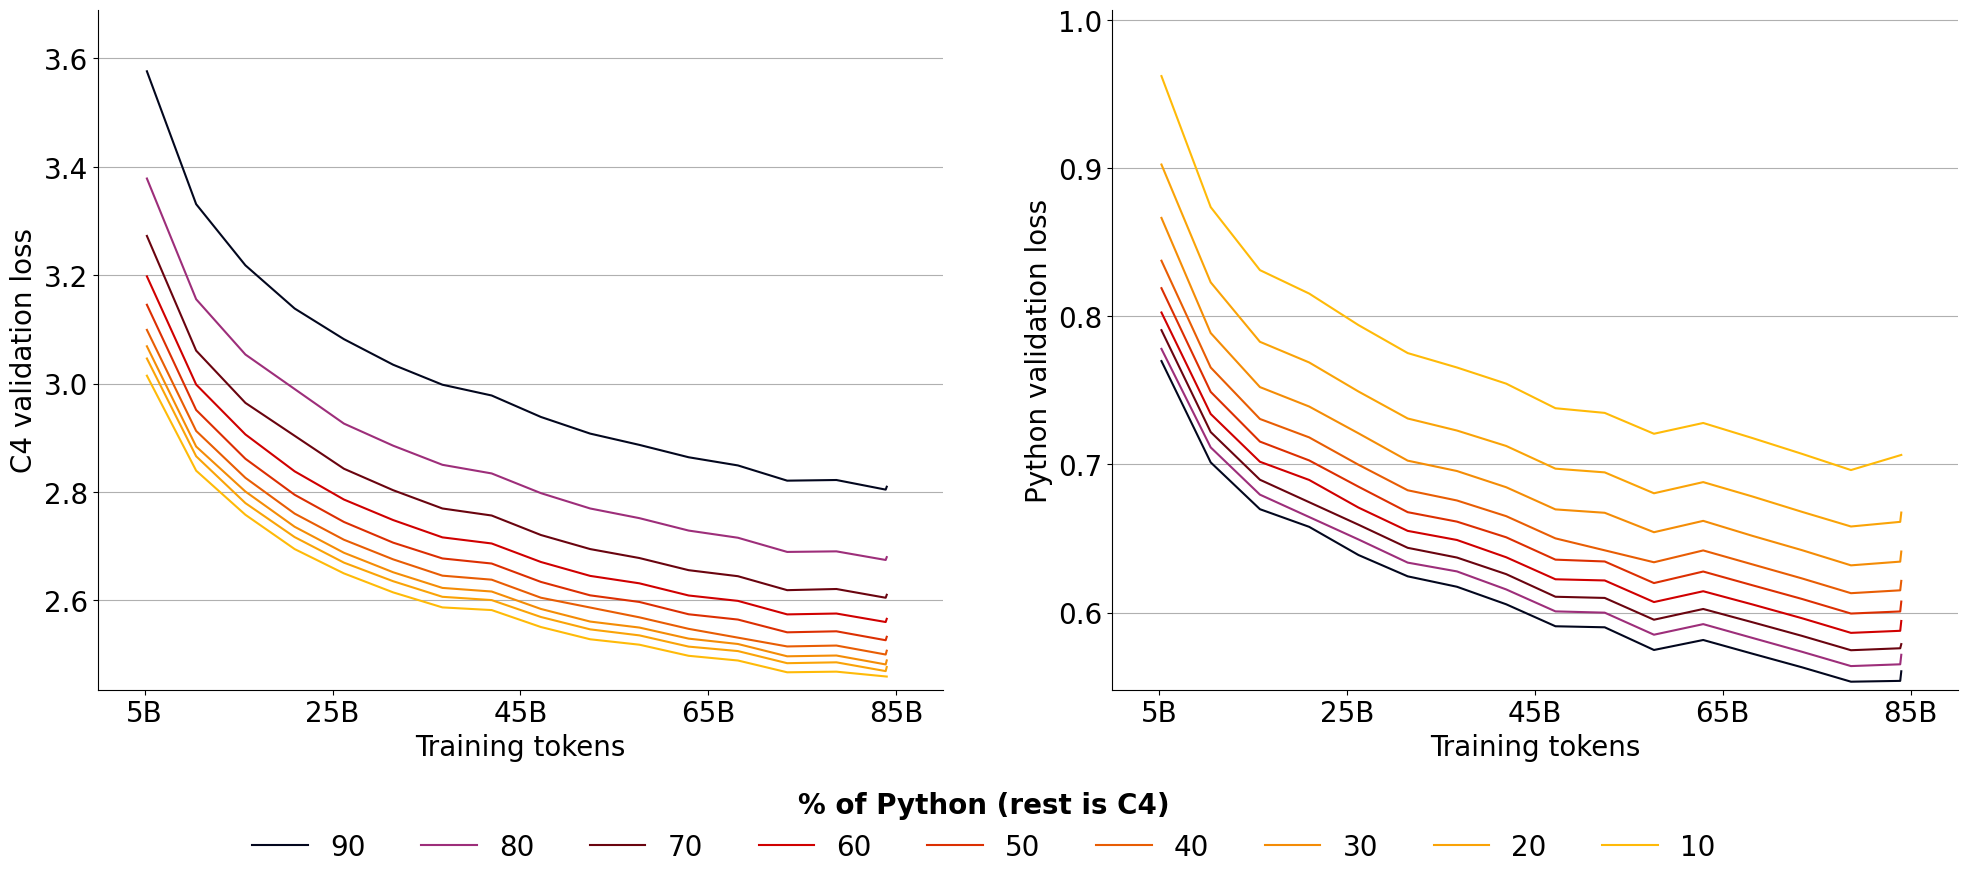

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


PREFIX_TO_EPOCHS = {
    "4b284b84b10c4py": 10,
    "4b284b84b20c4py": 20,
    "4b284b84b30c4py": 30,
    "4b284b84b40c4py": 40,
    "4b284b84b50c4py": 50,
    "4b284b84b60c4py": 60,
    "4b284b84b70c4py": 70,
    "4b284b84b80c4py": 80,
    "4b284b84b90c4py": 90,
}

EPOCHS_TO_COLOR = {
    10: "#03071E",
    20: "#9d2e7a",
    30: "#6A040F",
    40: "#D00000",
    50: "#DC2F02",
    60: "#E85D04",
    70: "#F48C06",
    80: "#FAA307",
    90: "#FFBA08",
}

TOKENS_TICKS_4 = [
    #1e9,
    5e9,
    #10e9,
    #20e9,
    25e9,
    #30e9,
    #40e9,
    45e9,
    #50e9,
    #60e9,
    65e9,
    #70e9,
    #80e9,
    85e9,
    #90e9,
    #100e9
]

TOKENS_STR_4 = [
    #"1B",
    "5B",
    #"10B",
    #"20B",
    "25B",
    #"30B",
    #"40B",
    "45B",
    #"50B",
    #"60B",
    "65B",
    #"70B",
    #"80B",
    "85B",
    #"90B"
    #"100B",
]


FONTSIZE = 20

fig, axes = plt.subplots(figsize=(24, 10), facecolor='w', nrows=1, ncols=2, edgecolor='k', sharey=False)

axes = axes.flatten()

MAX_MULT = 1.5

GROUPS = [
    (0, PY_TO_TB, data_c4, TOKENS_TICKS_4, TOKENS_STR_4),
    (1, PY_TO_TB, data_py, TOKENS_TICKS_4, TOKENS_STR_4),
]


for (i, models, data, ticks, ticks_str) in GROUPS:
    for model, model_data in zip(models, data):
        tokens = model_data[0]
        losses = model_data[1]
        prefix = model.split("_")[1]
        epochs = PREFIX_TO_EPOCHS[prefix]
        color = EPOCHS_TO_COLOR[epochs]
        axes[i].plot(tokens, losses, label=f"{100-epochs}", color=color, markersize=5)

    axes[i].grid(axis='y')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set_xticks(ticks, ticks_str, fontsize=FONTSIZE)
    axes[i].set_xlim((min(ticks) - 5e9, max(ticks) + 5e9))

    min_val = min(data, key=lambda x: x[1].min())[1].min()
    if i == 0:
        axes[i].set_ylim((min_val - min_val * 0.01, min_val * 1.5))
    else:
        axes[i].set_ylim((min_val - min_val * 0.01, min_val * 1.82))

    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    axes[i].set_xlabel("Training tokens", fontsize=FONTSIZE)
    if i == 0:
        axes[i].set_ylabel(f"C4 validation loss", fontsize=FONTSIZE)
    else:
        axes[i].set_ylabel(f"Python validation loss", fontsize=FONTSIZE)

    #axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE, fontweight="bold", pad=24)

handles, labels = axes[0].get_legend_handles_labels()

fig.legend(
    handles,#[::-1],
    labels,#[::-1],
    frameon=False,
    fontsize=FONTSIZE,
    #ncol=8,
    #loc=(0, 1.2),
    ncol=9,
    title="% of Python (rest is C4)",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    loc="lower center",
)

plt.subplots_adjust(wspace=0.2, bottom=0.2)


plt.savefig(f'validation_c4py.pdf', dpi=300, bbox_inches='tight')
plt.show()




In [17]:
from scipy.signal import savgol_filter

from typing import List
import os

# https://stackoverflow.com/questions/42281844/what-is-the-mathematics-behind-the-smoothing-parameter-in-tensorboards-scalar
def smooth(scalars: List[float], weight: float) -> List[float]:  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

FLT_TO_TB = {
    "tensorboard_4b284bc4dedup": "UwdkVmkiQx2L2FajGEYH8g",
    "tensorboard_4b284bc4perplexity25": "9Z2QQDpLTWmeF9ZLsxgbnA",
    "tensorboard_4b284b21bc4": "koZ9lRPxTnGW2DdG7TpTrw",
    "tensorboard_4b284b42bc4": "cXJZmYyeQdynLdmBaWYRnA",
}

DL = True
data_train = []
data_val = []

for k, v in FLT_TO_TB.items():
    if (DL == False) and ("4b284bc4" in k):
        experiment = tb.data.experimental.ExperimentFromDev(v)
        df = experiment.get_scalars()
        df[df["tag"] == f'lm-loss-validation/validation/lm loss validation vs tokens'].to_csv(f"{k}.csv")
        df[df["tag"] == f'lm-loss-training/lm loss vs tokens'].to_csv(f"{k}_training.csv")
    else:
        if ("4b284bc4" in k):
            !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tbfilter/{k}.csv
        else:
            !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tbvalidation/{k}.csv
        df = pd.read_csv(f"{k}.csv", index_col=0)
        data_val.append((df.step.values, df.value.values))

        if ("4b284bc4" in k):
            !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tbfilter/{k}_training.csv
        else:
            !wget https://huggingface.co/datasets/datablations/scripts/raw/main/tbtraining/{k}_training.csv
        df = pd.read_csv(f"{k}_training.csv", index_col=0)
        df['value'] = smooth(df["value"].values.tolist(), weight=0.999)
        data_train.append((df.step.values, df.value.values))

--2023-06-15 12:57:18--  https://huggingface.co/datasets/datablations/scripts/raw/main/tbfilter/tensorboard_4b284bc4dedup.csv
Resolving huggingface.co (huggingface.co)... 13.226.210.57, 13.226.210.120, 13.226.210.58, ...
Connecting to huggingface.co (huggingface.co)|13.226.210.57|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-15 12:57:19 ERROR 404: Not Found.

--2023-06-15 12:57:19--  https://huggingface.co/datasets/datablations/scripts/raw/main/tbfilter/tensorboard_4b284bc4dedup_training.csv
Resolving huggingface.co (huggingface.co)... 13.226.210.57, 13.226.210.120, 13.226.210.58, ...
Connecting to huggingface.co (huggingface.co)|13.226.210.57|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2023-06-15 12:57:19 ERROR 404: Not Found.

--2023-06-15 12:57:19--  https://huggingface.co/datasets/datablations/scripts/raw/main/tbfilter/tensorboard_4b284bc4perplexity25.csv
Resolving huggingface.co (huggingface.co)... 13.226.210.57, 13.2

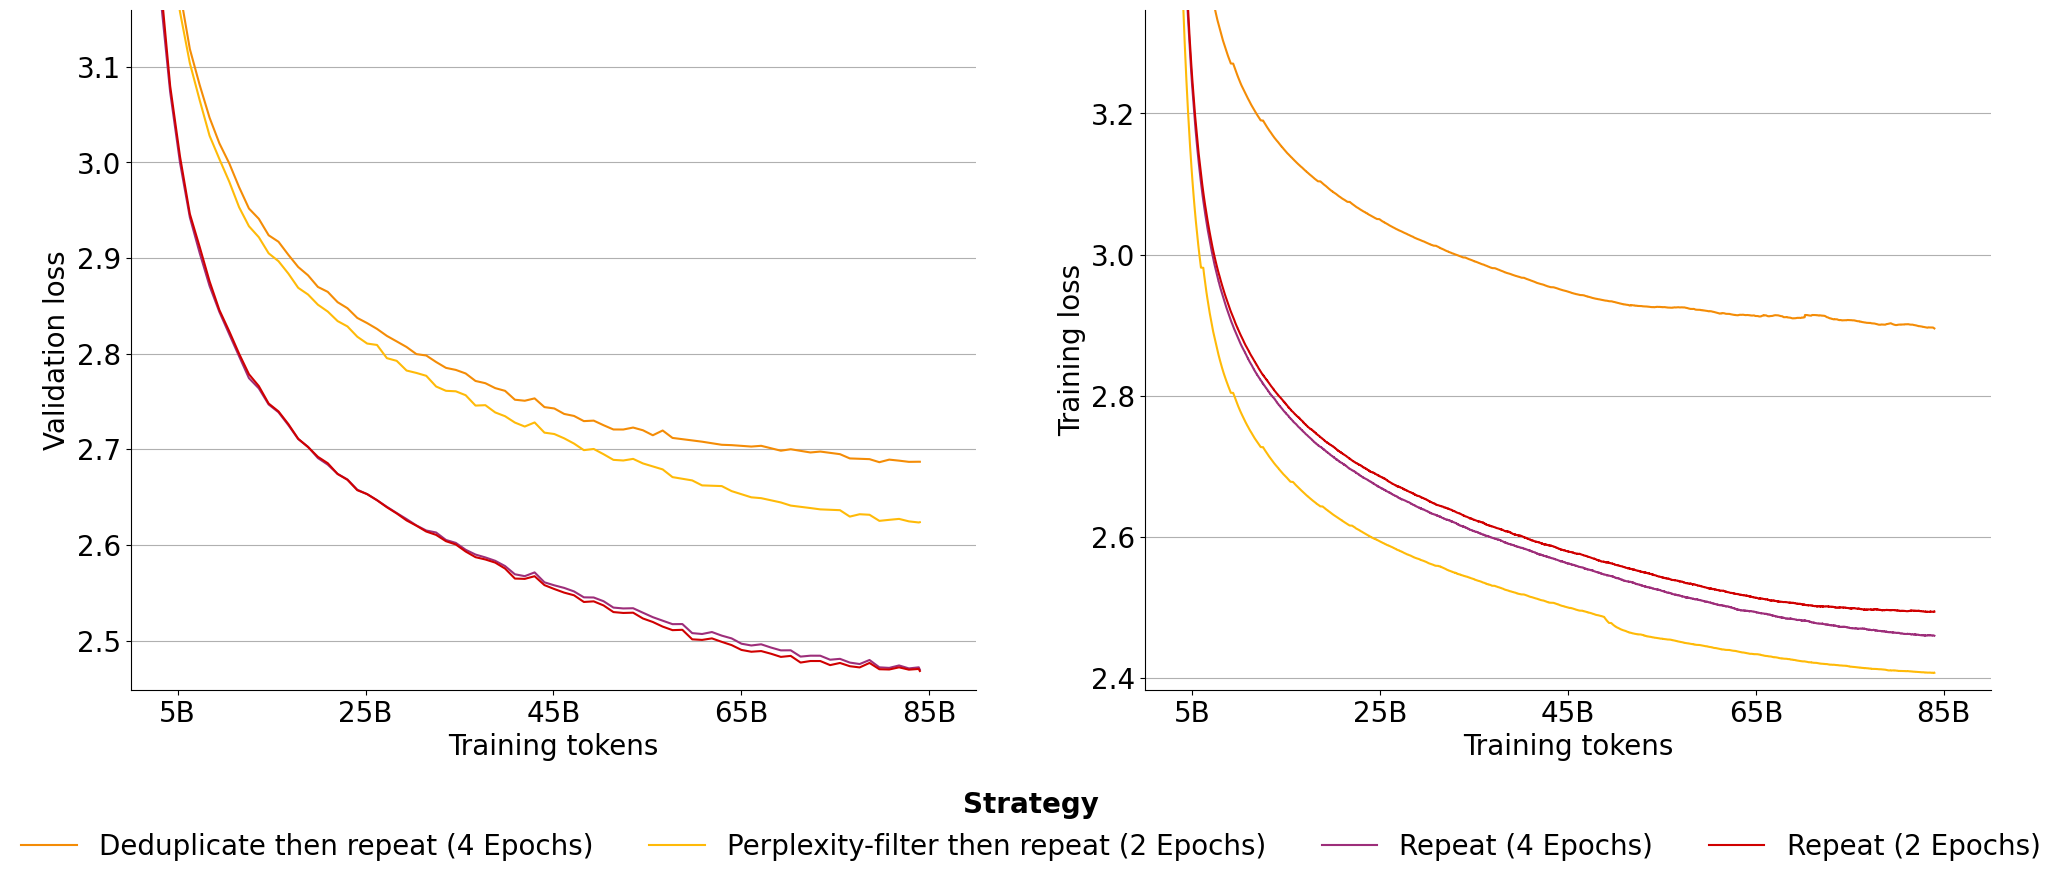

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib


PREFIX_TO_EPOCHS = {
    "4b284bc4dedup": "Deduplicate then repeat (4 Epochs)",
    "4b284bc4perplexity25": "Perplexity-filter then repeat (2 Epochs)",
    "4b284b21bc4": "Repeat (4 Epochs)",
    "4b284b42bc4": "Repeat (2 Epochs)",
}

EPOCHS_TO_COLOR = {
    10: "#03071E",
    "Repeat (4 Epochs)": "#9d2e7a",
    30: "#6A040F",
    "Repeat (2 Epochs)": "#D00000",
    50: "#DC2F02",
    60: "#E85D04",
    "Deduplicate then repeat (4 Epochs)": "#F48C06",
    80: "#FAA307",
    "Perplexity-filter then repeat (2 Epochs)": "#FFBA08",
}

TOKENS_TICKS_4 = [
    #1e9,
    5e9,
    #10e9,
    #20e9,
    25e9,
    #30e9,
    #40e9,
    45e9,
    #50e9,
    #60e9,
    65e9,
    #70e9,
    #80e9,
    85e9,
    #90e9,
    #100e9
]

TOKENS_STR_4 = [
    #"1B",
    "5B",
    #"10B",
    #"20B",
    "25B",
    #"30B",
    #"40B",
    "45B",
    #"50B",
    #"60B",
    "65B",
    #"70B",
    #"80B",
    "85B",
    #"90B"
    #"100B",
]


FONTSIZE = 20

fig, axes = plt.subplots(figsize=(24, 10), facecolor='w', nrows=1, ncols=2, edgecolor='k', sharey=False)

axes = axes.flatten()

MAX_MULT = 1.5

GROUPS = [
    (0, FLT_TO_TB, data_val, TOKENS_TICKS_4, TOKENS_STR_4),
    (1, FLT_TO_TB, data_train, TOKENS_TICKS_4, TOKENS_STR_4),
]


for (i, models, data, ticks, ticks_str) in GROUPS:
    for model, model_data in zip(models, data):
        tokens = model_data[0]
        losses = model_data[1]
        prefix = model.split("_")[1]
        epochs = PREFIX_TO_EPOCHS[prefix]
        color = EPOCHS_TO_COLOR[epochs]
        axes[i].plot(tokens, losses, label=f"{epochs}", color=color, markersize=5)

    axes[i].grid(axis='y')
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].set_xticks(ticks, ticks_str, fontsize=FONTSIZE)
    axes[i].set_xlim((min(ticks) - 5e9, max(ticks) + 5e9))

    min_val = min(data, key=lambda x: x[1].min())[1].min()
    if i == 0:
        axes[i].set_ylim((min_val - min_val * 0.008, min_val * 1.28))
    else:
        axes[i].set_ylim((min_val - min_val * 0.01, min_val * 1.39))

    axes[i].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    axes[i].set_xlabel("Training tokens", fontsize=FONTSIZE)
    if i == 0:
        axes[i].set_ylabel(f"Validation loss", fontsize=FONTSIZE)
    else:
        axes[i].set_ylabel(f"Training loss", fontsize=FONTSIZE)

    #axes[i].set_title(IDX_TO_TILE[i], fontsize=FONTSIZE, fontweight="bold", pad=24)

handles, labels = axes[0].get_legend_handles_labels()

fig.legend(
    handles,#[::-1],
    labels,#[::-1],
    frameon=False,
    fontsize=FONTSIZE,
    #ncol=8,
    #loc=(0, 1.2),
    ncol=4,
    title="Strategy",
    title_fontproperties={'weight': 'bold', "size": FONTSIZE},
    loc="lower center",
)

plt.subplots_adjust(wspace=0.2, bottom=0.2)


plt.savefig(f'training_validation_filter.pdf', dpi=300, bbox_inches='tight')
plt.show()




##### Downloading Tensorboards

In [ ]:
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/datablations/lm1-4b2-84b-c4py

Cloning into 'lm1-4b2-84b-c4py'...
remote: Enumerating objects: 4248, done.
remote: Counting objects: 100% (2163/2163), done.
remote: Compressing objects: 100% (1848/1848), done.
remote: Total 4248 (delta 381), reused 2060 (delta 313), pack-reused 2085
Receiving objects: 100% (4248/4248), 3.74 MiB | 2.00 MiB/s, done.
Resolving deltas: 100% (632/632), done.
Updating files: 100% (4074/4074), done.


In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b10c4py --name "tensorboard_4b284b84b10c4py"

2023-06-13 15:16:56.404427: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 15:16:57.370496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/LgjVGSJWTmqnOvOWtygXCw/

[2023-06-13T15:16:59] Started scanning logdir.
E0613 15:17:54.832016 140267462391616 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b20c4py --name "tensorboard_4b284b84b20c4py"

2023-06-13 18:27:29.695189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 18:27:30.679530: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/tPRSzWIETRa186YmXGjkZA/

[2023-06-13T18:27:32] Started scanning logdir.
E0613 18:29:54.880097 140530388375360 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b30c4py --name "tensorboard_4b284b84b30c4py"

2023-06-13 19:46:46.019930: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 19:46:47.088967: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b30c4py

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you a

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b40c4py --name "tensorboard_4b284b84b40c4py"

2023-06-14 20:18:58.590904: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 20:18:59.556653: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/swrEprtqTkO7RIx1K23BNw/

[2023-06-14T20:19:01] Started scanning logdir.
E0614 20:19:50.007082 139642082699072 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b50c4py --name "tensorboard_4b284b84b50c4py"

2023-06-14 18:54:28.094118: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 18:54:29.329614: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/NhjyJzbBS7uYZ7VF5h4a1Q/

[2023-06-14T18:54:31] Started scanning logdir.
E0614 18:55:52.640266 139706017462080 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b60c4py --name "tensorboard_4b284b84b60c4py"

2023-06-14 17:11:49.614503: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 17:11:50.670469: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/8Cepmp2DT5250sjhluRX3g/

[2023-06-14T17:11:52] Started scanning logdir.
E0614 17:12:49.175194 140056380106560 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b70c4py --name "tensorboard_4b284b84b70c4py"

2023-06-14 16:18:48.213394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 16:18:49.055286: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/ZGAYe7cnQLG6qNTXZqb1Qg/

[2023-06-14T16:18:50] Started scanning logdir.
E0614 16:19:49.260513 140594507065152 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b80c4py --name "tensorboard_4b284b84b80c4py"

2023-06-14 14:35:38.103767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 14:35:39.086505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/xrS5xq7rRAy6YMN7t0bVnA/

[2023-06-14T14:35:40] Started scanning logdir.
E0614 14:36:53.292577 140002046355264 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b90c4py --name "tensorboard_4b284b84b90c4py"

2023-06-14 13:56:56.255431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-14 13:56:57.024455: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b90c4py

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you a

In [ ]:
!cd /content/lm1-4b2-84b-c4py; git lfs pull --include="tensorboard/*/*"

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard --name "tensorboard_4b284bc4py"

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard --name "tensorboard_4b284bc4py"

2023-06-13 15:05:01.954487: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 15:05:03.321052: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/JBNmO6tPSwuY5QPzs2nrig/

[2023-06-13T15:05:05] Started scanning logdir.
E0613 15:05:58.319115 140418179802944 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard --name "tensorboard_4b284bc4py"

2023-06-13 13:05:26.187102: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 13:05:27.209513: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Upload started and will continue reading any new data as it's added to the logdir.

To stop uploading, press Ctrl-C.

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/0nGMMs4BTg60mnqSR8A9Zw/

[2023-06-13T13:05:29] Started scanning logdir.
E0613 13:06:54.946427 140598428182336 uploader.py:564] Upload call failed with error <_InactiveRpcError of RPC that terminated with:
	status = StatusCode.RESOURCE_EXHAUSTED
	details = "Rate limit exceeded. Please try again later."
	debug_error_string = "UNKNOWN:Error received from peer ip

In [ ]:
!tensorboard dev upload --logdir /content/lm1-4b2-84b-c4py/tensorboard/tensorboard_4b284b84b10c4py --name "tensorboard_4b284b84b10c4py"